In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt


In [3]:

# Load data
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')


In [16]:
# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin cơ bản về dữ liệu:")
print(data.info())

Thông tin cơ bản về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB
None


In [17]:
# Hiển thị 5 hàng đầu tiên của dữ liệu
print("\n5 hàng đầu tiên của dữ liệu:")
print(data.head())


5 hàng đầu tiên của dữ liệu:
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]


In [18]:
# Kiểm tra các class và số lượng tương ứng
print("\nSố lượng các mẫu dữ liệu cho từng lớp (class):")
print(data['0'].value_counts())


Số lượng các mẫu dữ liệu cho từng lớp (class):
0
14.0    57825
18.0    48419
20.0    29008
2.0     23409
19.0    22495
15.0    19341
13.0    19010
0.0     13869
12.0    12336
11.0    11586
17.0    11566
4.0     11440
24.0    10859
22.0    10784
3.0     10134
1.0      8668
9.0      8493
7.0      7218
23.0     6272
25.0     6076
16.0     5812
6.0      5762
10.0     5603
21.0     4182
5.0      1163
8.0      1120
Name: count, dtype: int64


In [4]:
# Prepare data
X = data.drop('0', axis=1).values
y = data['0'].values
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=26)

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Build LSTM model
model = Sequential([
    Input(shape=(28, 28)),
    LSTM(128, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 186s 38ms/step - accuracy: 0.9075 - loss: 0.3189 - val_accuracy: 0.9638 - val_loss: 0.1247
Epoch 2/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 169s 36ms/step - accuracy: 0.9665 - loss: 0.1094 - val_accuracy: 0.9701 - val_loss: 0.1016
Epoch 3/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 317s 68ms/step - accuracy: 0.9752 - loss: 0.0825 - val_accuracy: 0.9744 - val_loss: 0.0870
Epoch 4/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 266s 57ms/step - accuracy: 0.9791 - loss: 0.0671 - val_accuracy: 0.9763 - val_loss: 0.0804
Epoch 5/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 182s 39ms/step - accuracy: 0.9813 - loss: 0.0578 - val_accuracy: 0.9788 - val_loss: 0.0765
Epoch 6/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 585s 126ms/step - accuracy: 0.9839 - loss: 0.0507 - val_accuracy: 0.9784 - val_loss: 0.0760
Epoch 7/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 175s 38ms/step - accuracy: 0.9850 - loss: 0.0462 - val_accuracy: 0.9791 - val_loss: 0.0750
Epoch 8/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 174s 37ms/step - accuracy:

In [15]:
# Đánh giá mô hình
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9817 - loss: 0.0729
Test loss: 0.06867940723896027
Test accuracy: 0.9823868870735168


In [8]:

# Save model
model.save('handwritten_character_recognition_lstm.h5')

In [19]:
# Preprocess image for prediction
def resize_image(image_path, target_size=(28, 28)):
    image = Image.open(image_path).convert('L')
    ratio = min(target_size[0] / image.width, target_size[1] / image.height)
    new_size = (int(image.width * ratio), int(image.height * ratio))
    resized_image = image.resize(new_size, Image.LANCZOS)
    new_image = Image.new('L', target_size, (255))
    new_image.paste(resized_image, ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2))
    return new_image

def preprocess_image(image_path):
    image = resize_image(image_path)
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array.reshape(1, 28, 28, 1)
    return image_array

# Predict character from image
def predict_character(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions, axis=1)
    predicted_character = chr(predicted_label[0] + ord('A'))
    return predicted_character

image_path = r'C:\Users\ADMIN\Downloads\D.jpg'  # Ensure path is correctly formatted
predicted_character = predict_character(model, image_path)
print(f'Predicted character: {predicted_character}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted character: M


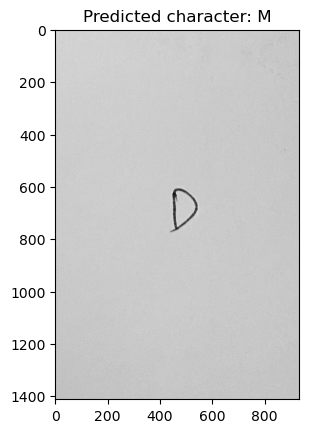

In [20]:

# Plot the image and the predicted character
image = Image.open(image_path).convert('L')
plt.imshow(image, cmap='gray')
plt.title(f'Predicted character: {predicted_character}')
plt.show()
